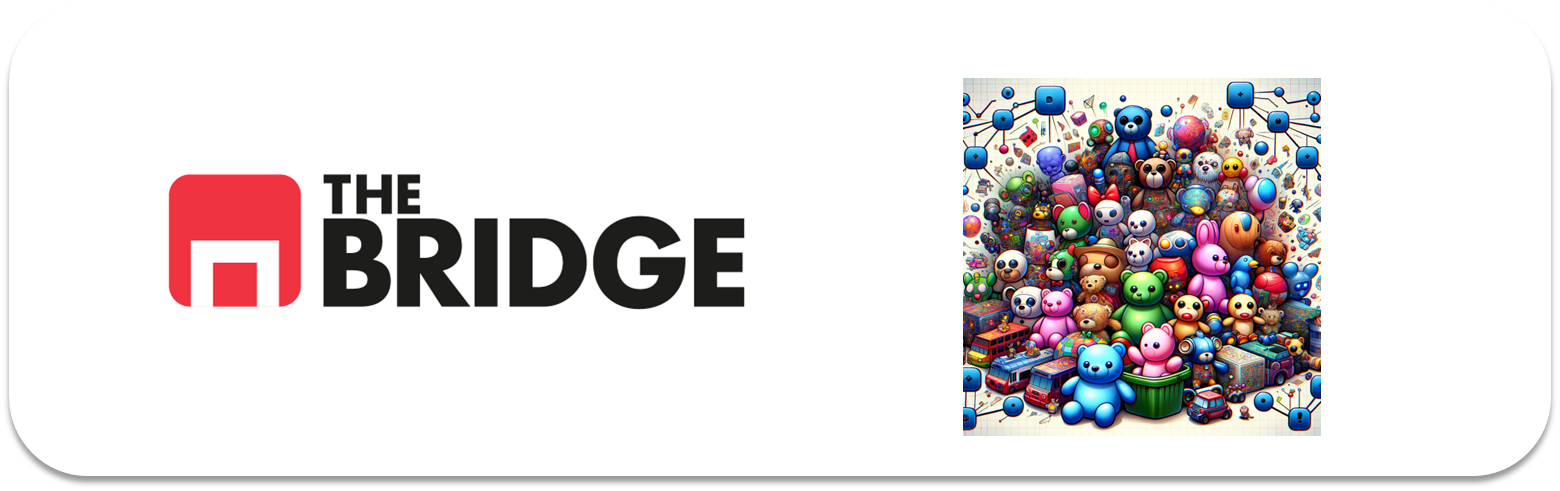

## PRACTICA OBLIGATORIA: **DBSCAN y Clustering Jerárquico**

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

df = pd.read_csv("./data/empowering_drinks.csv", sep="|")
df.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.518613,0.232053,1.034819,1.013009,0.251717
1,0.246290,-0.827996,0.733629,0.965242,-0.293321
2,0.196879,1.109334,1.215533,1.395148,0.269020
3,1.691550,0.487926,1.466525,2.334574,1.186068
4,0.295700,1.840403,0.663351,-0.037874,-0.319276


### Parte I. Modelado

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


In [3]:
df.describe()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.019231,0.037273,0.041057,0.080022,-0.044088
std,1.026182,0.995984,1.040928,1.009450,0.934399
min,-2.434235,-3.679162,-1.695971,-1.493188,-1.634288
25%,-0.816038,-0.499016,-1.043392,-0.738463,-0.799428
50%,0.061000,-0.023821,0.211566,-0.165254,-0.154899
75%,0.876275,0.707247,0.894264,0.917474,0.493956
max,2.259772,3.156325,3.062832,2.971473,2.431870


In [4]:
df.columns.to_list()

['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico', 'Taurina']

In [5]:
features= df.columns.to_list() 
features

['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico', 'Taurina']

In [6]:
X= df[features].copy()  #creacion del dataset de trabajo

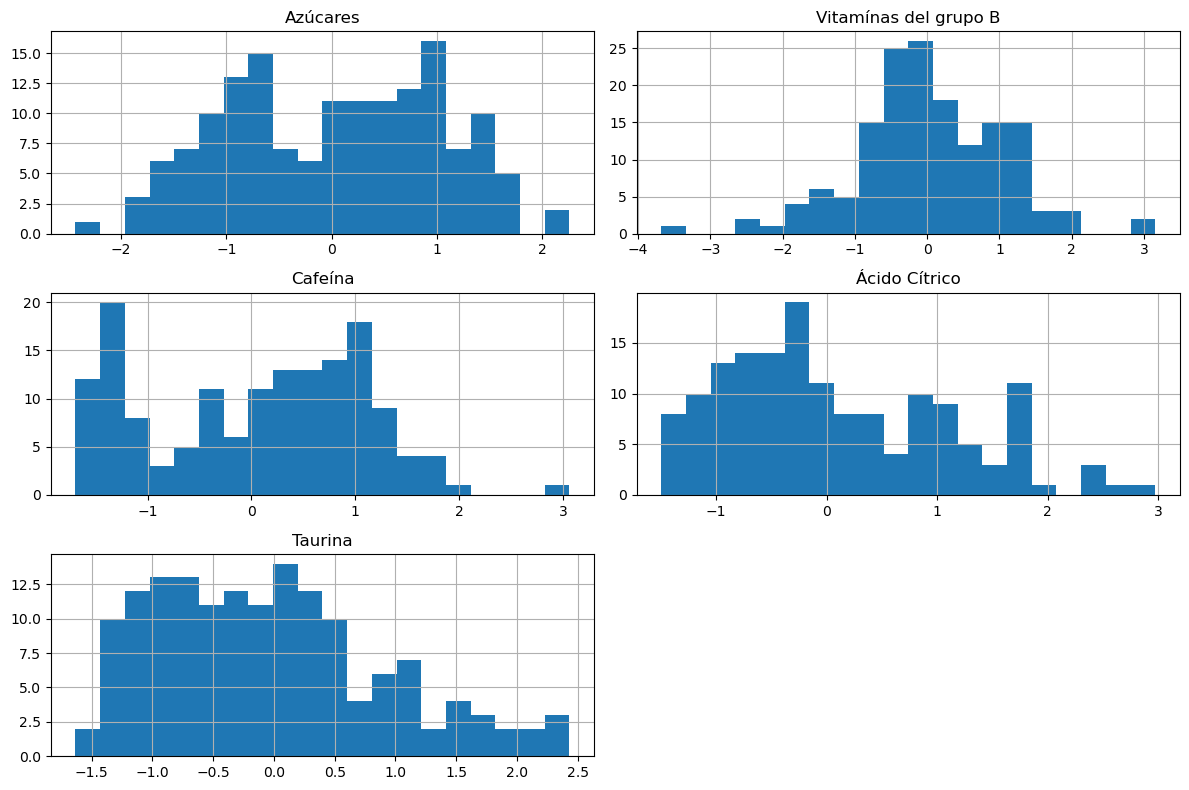

In [7]:
X.hist(bins=20, figsize=(12,8))
plt.tight_layout()

In [8]:
X.isnull().sum()  # sino es así hay que hacer es X.dropna()

Azúcares                 0
Vitamínas del grupo B    0
Cafeína                  0
Ácido Cítrico            0
Taurina                  0
dtype: int64

In [9]:
# si hubiera que escalar
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

DBSCAN  Eleccion de Hiperparametros  

eps → radio de vecindad  

min_samples → puntos mínimos para formar un núcleo  

Para elegir eps, usamos el k-distance plot.

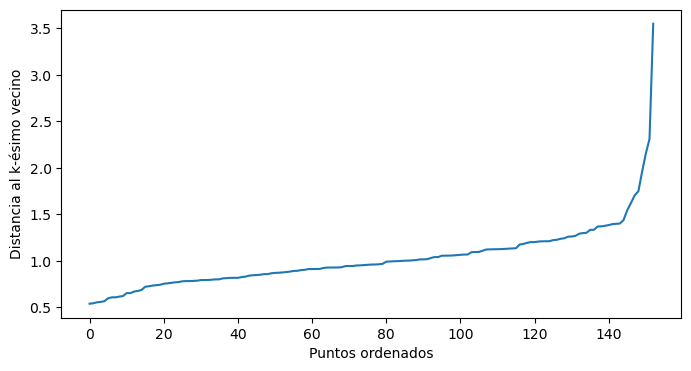

In [10]:
from sklearn.neighbors import NearestNeighbors

#No sé porque se pone un K=5???
k = 5
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X)

distances, _ = nn.kneighbors(X)
distances = np.sort(distances[:, k-1])

plt.figure(figsize=(8,4))
plt.plot(distances)
plt.ylabel("Distancia al k-ésimo vecino")
plt.xlabel("Puntos ordenados")
plt.show()

In [11]:
#Entrenamiento del DBSCAN

In [16]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=1.5, #pongo 1,3 por el codo del grafico de arriba
    min_samples=5
)

labels_db = dbscan.fit_predict(X)

In [17]:
#Añadimos la columna cluster al dataframe
df_db = X.loc[X.index].copy()  #primero hago copia de seguridad
df_db["cluster_dbscan"] = labels_db

In [18]:
df_db["cluster_dbscan"].value_counts()

cluster_dbscan
 0    149
-1      4
Name: count, dtype: int64

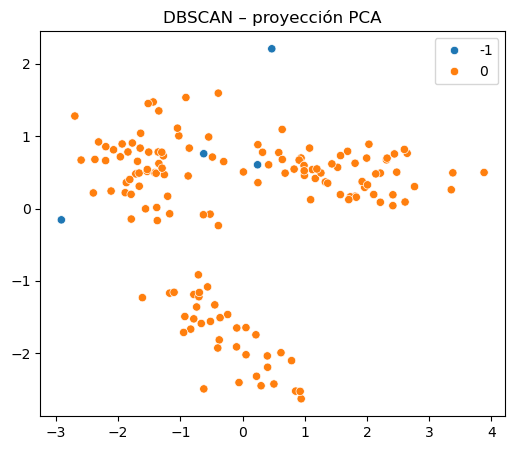

In [19]:
#Visualizacion en 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,5))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=labels_db,
    palette="tab10"
)
plt.title("DBSCAN – proyección PCA")
plt.show()

**No hay mas que un cluster y unos pocos outliers**

## Clustering Jerarquico ##

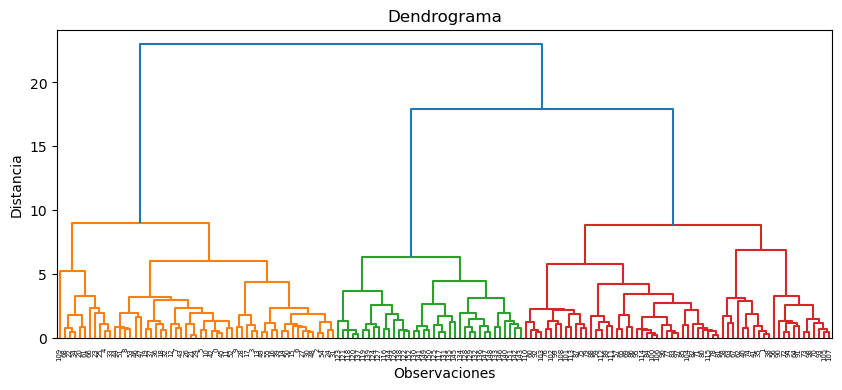

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X, method="ward")

plt.figure(figsize=(10,4))
dendrogram(Z)
plt.title("Dendrograma")
plt.xlabel("Observaciones")
plt.ylabel("Distancia")
plt.show()

In [22]:
#parece que hay 3 clusteres, por tanto k=3

In [23]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(
    n_clusters=3,
    linkage="ward"
)

labels_hc = hc.fit_predict(X)

In [24]:
df_hc = df.loc[X.index].copy()
df_hc["cluster_hc"] = labels_hc

In [25]:
df_hc

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,cluster_hc
0,1.518613,0.232053,1.034819,1.013009,0.251717,0
1,0.246290,-0.827996,0.733629,0.965242,-0.293321,1
2,0.196879,1.109334,1.215533,1.395148,0.269020,0
3,1.691550,0.487926,1.466525,2.334574,1.186068,0
4,0.295700,1.840403,0.663351,-0.037874,-0.319276,0
...,...,...,...,...,...,...
148,0.493343,0.414820,-1.284344,0.009893,0.969783,2
149,0.332758,-0.389355,-1.344582,0.280575,2.224236,2
150,0.209232,0.012732,-1.354622,0.296498,1.834923,2
151,1.395086,1.365208,-1.274305,-0.595160,1.791666,2


### Visualizacion ###

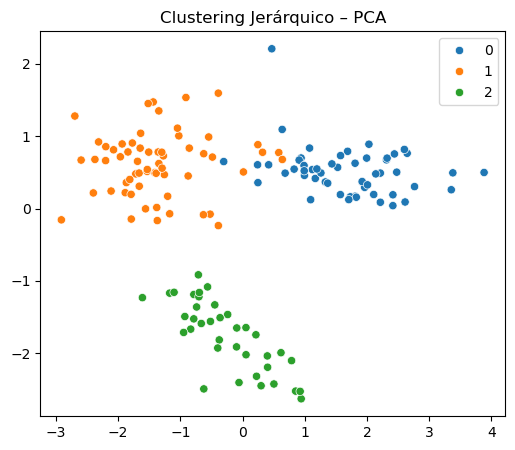

In [26]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=labels_hc,
    palette="tab10"
)
plt.title("Clustering Jerárquico – PCA")
plt.show()

Discusión de resultados (ejemplo de interpretación)

DBSCAN

Detecta bebidas atípicas (cluster -1)
Clústeres basados en densidad real
Sensible a escalado y eps

Jerárquico

Siempre asigna clúster
Da estructura global
No detecta outliers explícitos

👉 En datasets con ruido y valores extremos, DBSCAN suele ser más realista.
👉 Para segmentación forzada, jerárquico es más estable.

## Parte II Nuevo Experimento ##

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [28]:
# Aquí la idea no es repetir mecánicamente la Parte I, sino aprender qué pasa cuando cambian los datos y 
# cómo reaccionan DBSCAN y el clustering jerárquico.

Entender el nuevo experimento

Este segundo CSV suele representar:

nuevas bebidas

nuevas condiciones experimentales

o nuevas features / escalas

👉 Objetivo:
ver si los patrones de agrupación se mantienen, cambian o directamente dejan de tener sentido.

Esto es muy realista en proyectos de datos: el modelo “bonito” del primer dataset no siempre generaliza.

In [30]:
df_exp = pd.read_csv("./data/new_experiments.csv", sep="|")
df_exp.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.481555,0.305159,1.366128,2.239039,0.731870
1,0.616869,0.890014,0.583034,0.312420,-0.665332
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583


In [31]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               6 non-null      float64
 1   Vitamínas del grupo B  6 non-null      float64
 2   Cafeína                6 non-null      float64
 3   Ácido Cítrico          6 non-null      float64
 4   Taurina                6 non-null      float64
dtypes: float64(5)
memory usage: 372.0 bytes


In [33]:
df_exp.describe()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.028059,0.085839,-0.348982,0.106490,-0.032337
std,1.205271,0.826463,1.139233,1.157346,1.143657
min,-1.680724,-1.412851,-1.565455,-1.193845,-0.976782
25%,-0.766628,-0.106066,-1.211557,-0.368265,-0.704263
50%,0.165997,0.323436,-0.561488,-0.149331,-0.593957
75%,0.876275,0.561033,0.352122,0.212905,0.418256
max,1.481555,0.890014,1.366128,2.239039,1.956043


In [34]:
df_exp.columns

Index(['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico',
       'Taurina'],
      dtype='object')

In [37]:
features_exp= df_exp.columns.to_list()
features_exp

['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico', 'Taurina']

In [38]:
X_exp=df_exp[features_exp].copy()

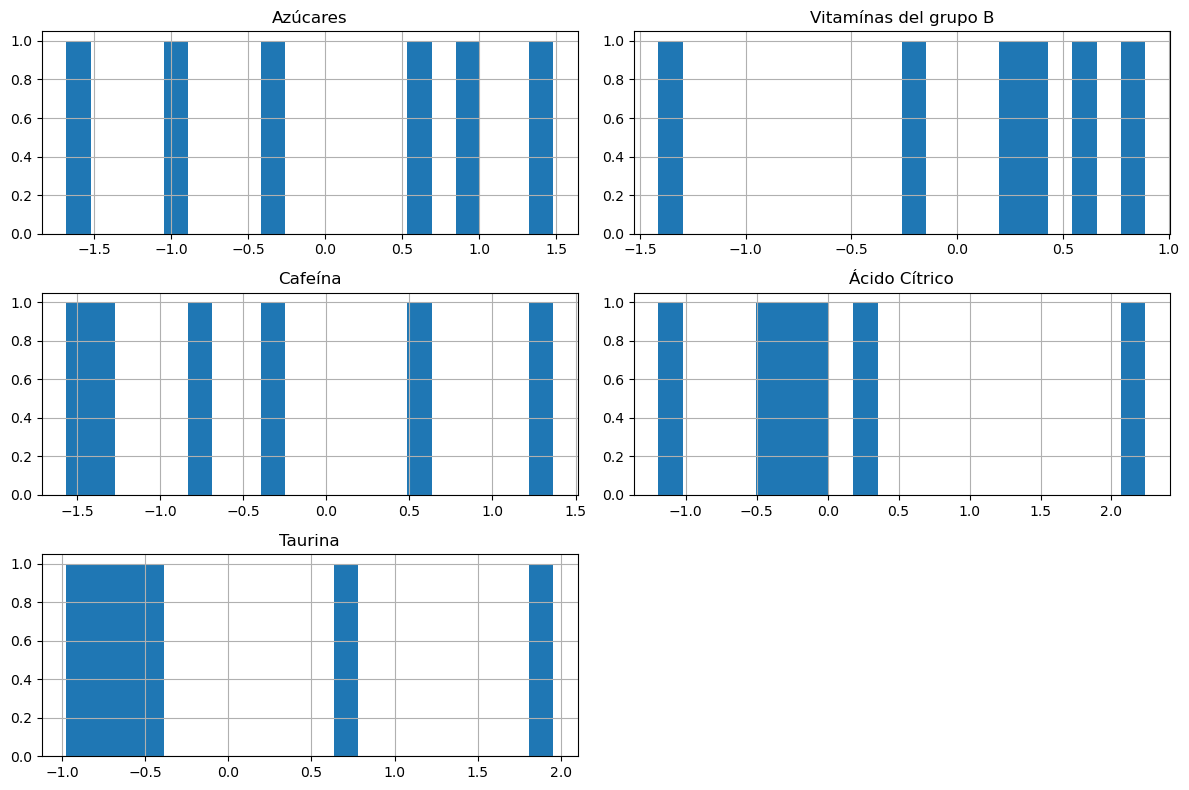

In [39]:
X_exp.hist(bins=20, figsize=(12,8))
plt.tight_layout()

In [40]:
#No hace falta escalar. pero si hubiera que hacerlo sería:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_exp_scaled = scaler.fit_transform(X_exp)

C:\Users\USUARIO\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\USUARIO\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\USUARIO\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USUARIO\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~

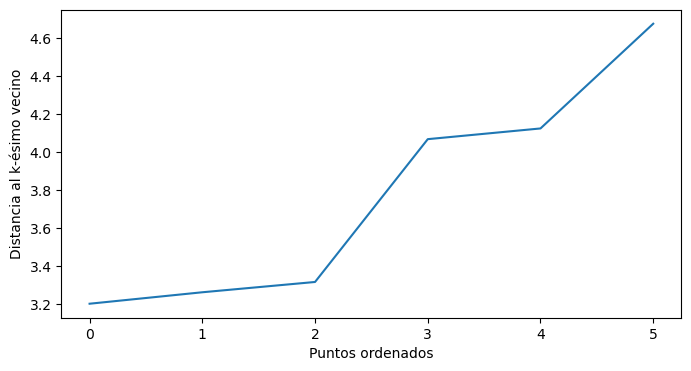

In [42]:
# Vamos a hacer el K-distance plot (otra vez)
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

k = 5
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_exp)

distances, _ = nn.kneighbors(X_exp)
distances = np.sort(distances[:, k-1])

plt.figure(figsize=(8,4))
plt.plot(distances)
plt.ylabel("Distancia al k-ésimo vecino")
plt.xlabel("Puntos ordenados")
plt.show()

In [ ]:
eps = 4.1

In [43]:
#entrenamiento con el DBSCAN de nuevo
from sklearn.cluster import DBSCAN

dbscan_exp = DBSCAN(
    eps=4.1,
    min_samples=5
)

labels_db_exp = dbscan_exp.fit_predict(X_exp)

In [44]:
df_exp_db = df_exp.loc[X_exp.index].copy()
df_exp_db["cluster_dbscan"] = labels_db_exp

In [45]:
df_exp_db["cluster_dbscan"].value_counts()

cluster_dbscan
0    6
Name: count, dtype: int64

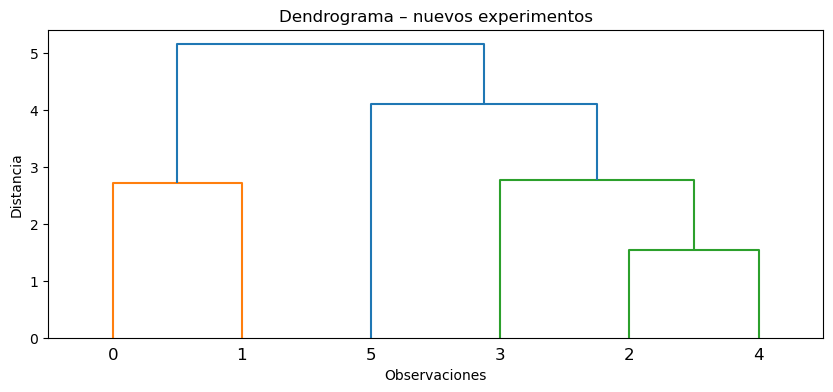

In [46]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z_exp = linkage(X_exp, method="ward")

plt.figure(figsize=(10,4))
dendrogram(Z_exp)
plt.xlabel("Observaciones")
plt.ylabel("Distancia")
plt.title("Dendrograma – nuevos experimentos")
plt.show()

In [47]:
#se supone que k = 4???

In [48]:
from sklearn.cluster import AgglomerativeClustering

hc_exp = AgglomerativeClustering(
    n_clusters=4,
    linkage="ward"
)

labels_hc_exp = hc_exp.fit_predict(X_exp)

In [49]:
df_exp_hc = df_exp.loc[X_exp.index].copy()
df_exp_hc["cluster_hc"] = labels_hc_exp

In [50]:
#Visualizacion
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_exp_pca = pca.fit_transform(X_exp)

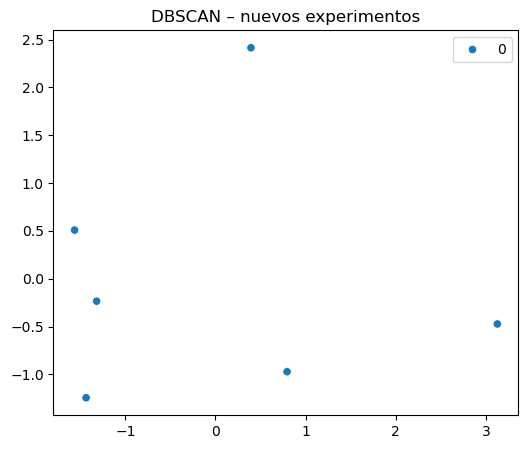

In [51]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=X_exp_pca[:,0],
    y=X_exp_pca[:,1],
    hue=labels_db_exp,
    palette="tab10"
)
plt.title("DBSCAN – nuevos experimentos")
plt.show()

In [52]:
#Visualizacion Jerarquico

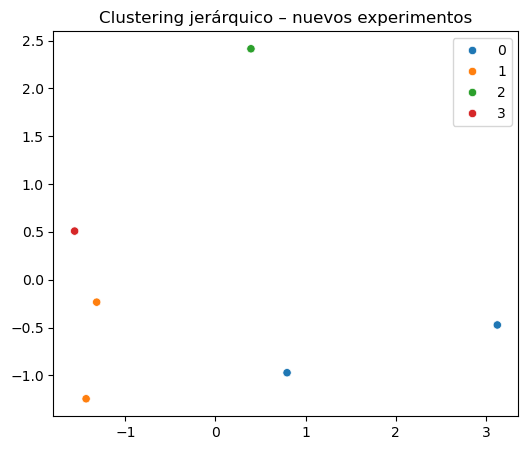

In [53]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=X_exp_pca[:,0],
    y=X_exp_pca[:,1],
    hue=labels_hc_exp,
    palette="tab10"
)
plt.title("Clustering jerárquico – nuevos experimentos")
plt.show()

Discusión y conclusiones (muy importante)
🔹 Qué cambia respecto a la Parte I

DBSCAN  
Mucho más sensible a la dispersión  
Detecta más ruido  
Puede generar menos clústeres o incluso uno solo  

Clustering jerárquico  

Más estable  
Siempre produce segmentación  
No distingue explícitamente outliers  

In [55]:
#En los nuevos experimentos se observa que DBSCAN es altamente sensible a cambios en la distribución de los datos, 
#aumentando el número de puntos considerados ruido. El clustering jerárquico, aunque menos expresivo en la detección de anomalías, ofrece una segmentación más estable y comparable entre experimentos, 
#lo que lo hace más adecuado cuando se requiere consistencia en la agrupación.

### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.